<a href="https://colab.research.google.com/github/Vijaykumar-HealthGIS/NLP/blob/main/IIPH_SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

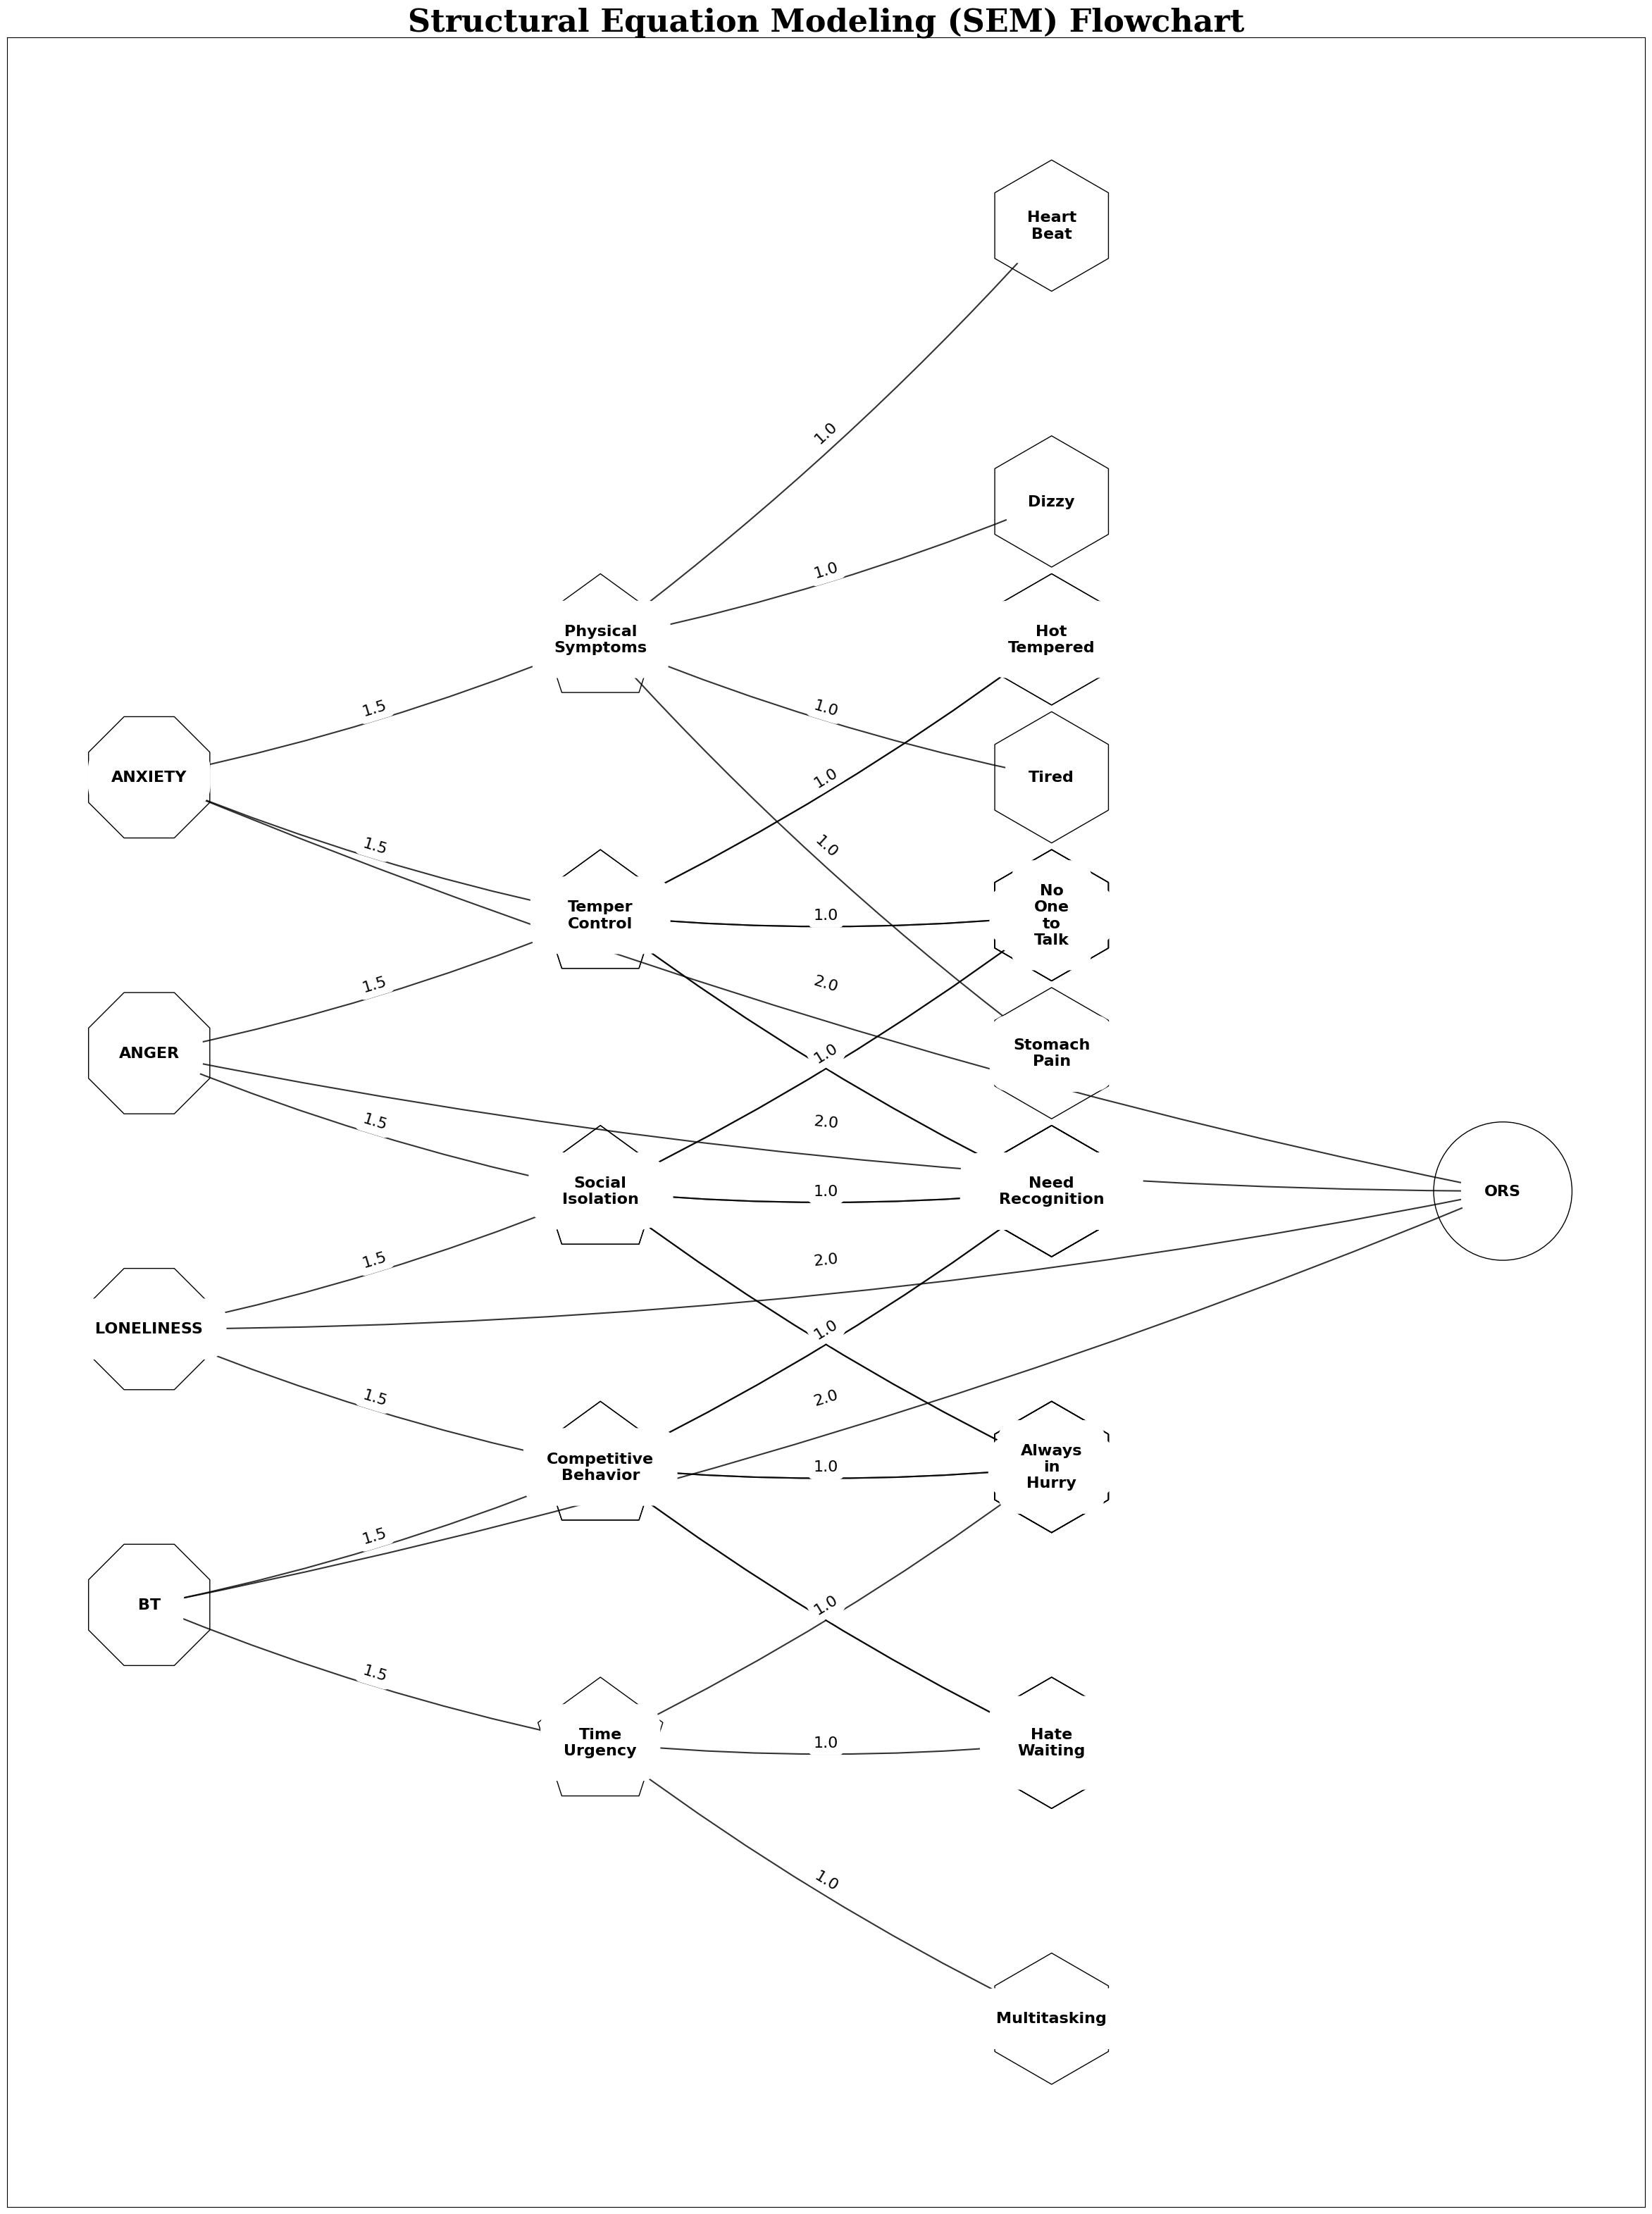

Flowchart saved as 'Large_Readable_SEM_Flowchart.jpeg'.


In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import textwrap

# Set font to a serif family with fallback options
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times', 'DejaVu Serif']

# ------------------------------
# STEP 1: Define Your SEM Structure
# ------------------------------
dependent_variable = "ORS"

independent_constructs = ["ANXIETY", "ANGER", "LONELINESS", "BT"]

latent_vars = {
    "ANXIETY": ["Physical Symptoms", "Cognitive Symptoms"],
    "ANGER": ["Temper Control", "Frustration"],
    "LONELINESS": ["Social Isolation", "Emotional Distress"],
    "BT": ["Competitive Behavior", "Time Urgency"]
}

observed_vars = {
    "Physical Symptoms": ["Heart Beat", "Dizzy", "Tired", "Stomach Pain"],
    "Cognitive Symptoms": ["Fear", "Panic", "Falling Apart"],
    "Temper Control": ["Hot Tempered", "Fiery Temper", "Angry"],
    "Frustration": ["Annoyed", "Criticism", "Blood Boil"],
    "Social Isolation": ["No One to Talk", "Lack Companionship", "Left Out"],
    "Emotional Distress": ["Completely Alone", "Excluded", "Withdrawn"],
    "Competitive Behavior": ["Need Recognition", "Hate Losing", "Work Under Pressure"],
    "Time Urgency": ["Always in Hurry", "Hate Waiting", "Multitasking"]
}

# ------------------------------
# STEP 2: Build the Graph
# ------------------------------
G = nx.DiGraph()

# 2.1 Independent Constructs → Dependent Variable (weight=2.0)
for construct in independent_constructs:
    G.add_node(construct)
    G.add_edge(construct, dependent_variable, weight=2.0)

# 2.2 Latent Variables (construct → latent) (weight=1.5)
for construct, lv_list in latent_vars.items():
    for lv in lv_list:
        G.add_node(lv)
        G.add_edge(construct, lv, weight=1.5)

# 2.3 Observed Variables (latent → observed) (weight=1.0)
for lv, ov_list in observed_vars.items():
    for ov in ov_list:
        G.add_node(ov)
        G.add_edge(lv, ov, weight=1.0)

# 2.4 Ensure Dependent Variable is added
G.add_node(dependent_variable)

# ------------------------------
# STEP 3: Manual Tree Layout (Left to Right)
# ------------------------------
pos = {}
x_gap = 12.0        # Horizontal gap between layers
y_gap_item = 6.0    # Vertical gap between nodes in the same layer
current_x = 0.0

# LAYER 0: Independent Constructs
n_indep = len(independent_constructs)
top_y_indep = (n_indep - 1) * y_gap_item / 2.0
for i, construct in enumerate(independent_constructs):
    pos[construct] = (current_x, top_y_indep - i * y_gap_item)

# LAYER 1: Latent Variables
current_x += x_gap
for construct in independent_constructs:
    lv_list = latent_vars.get(construct, [])
    if not lv_list:
        continue
    c_y = pos[construct][1]
    n_latent = len(lv_list)
    top_y_lv = c_y + (n_latent - 1) * y_gap_item / 2.0
    for j, lv in enumerate(lv_list):
        pos[lv] = (current_x, top_y_lv - j * y_gap_item)

# LAYER 2: Observed Variables
current_x += x_gap
all_latent = [lv for sublist in latent_vars.values() for lv in sublist]
for lv in all_latent:
    ov_list = observed_vars.get(lv, [])
    if not ov_list:
        continue
    lv_y = pos[lv][1]
    n_obs = len(ov_list)
    top_y_ov = lv_y + (n_obs - 1) * y_gap_item / 2.0
    for k, ov in enumerate(ov_list):
        pos[ov] = (current_x, top_y_ov - k * y_gap_item)

# LAYER 3: Dependent Variable (ORS)
current_x += x_gap
pos[dependent_variable] = (current_x, 0.0)

# ------------------------------
# STEP 4: Draw the Graph (Large, Readable)
# ------------------------------
plt.figure(figsize=(30, 40))  # Increase figure size for clarity

# 4.1 Draw edges with larger arrows and thicker lines
nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=5,
    width=1.5,
    connectionstyle='arc3,rad=0.05',
    min_source_margin=35,
    min_target_margin=35,
    alpha=0.8
)

# 4.2 Define node groups
latent_list = [lv for sublist in latent_vars.values() for lv in sublist]
observed_list = [ov for sublist in observed_vars.values() for ov in sublist]

# Draw Independent Constructs as octagons (bigger)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=independent_constructs,
    node_shape='8',
    node_color='none',
    edgecolors='black',
    node_size=18000
)

# Draw Latent Variables as pentagons (bigger)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=latent_list,
    node_shape='p',
    node_color='none',
    edgecolors='black',
    node_size=18000
)

# Draw Observed Variables as hexagons (bigger)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=observed_list,
    node_shape='h',
    node_color='none',
    edgecolors='black',
    node_size=18000
)

# Draw Dependent Variable as circle (bigger)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=[dependent_variable],
    node_shape='o',
    node_color='none',
    edgecolors='black',
    node_size=20000
)

# 4.3 Create labels: Each word on a new line.
formatted_labels = {}
for node in G.nodes():
    # Split by space so each word appears on a new line.
    formatted_labels[node] = "\n".join(node.split())

# Draw node labels with a spacious bounding box for clarity.
nx.draw_networkx_labels(
    G, pos,
    labels=formatted_labels,
    font_size=16,
    font_weight='bold',
    bbox=dict(boxstyle="round,pad=1.5", fc="white", ec="none", alpha=1.0)
)

# 4.4 Draw edge labels (weights) at the center of each edge.
edge_labels = {(u, v): f"{G[u][v]['weight']}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=16,
    label_pos=0.5  # Center the label on the edge
)

plt.title("Structural Equation Modeling (SEM) Flowchart", fontsize=32, fontweight="bold")
jpeg_path = "Large_Readable_SEM_Flowchart.jpeg"
plt.savefig(jpeg_path, format="jpeg", dpi=500)
plt.show()

print(f"Flowchart saved as '{jpeg_path}'.")
